In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset desde el archivo CSV
df = pd.read_csv('boston.csv')

# Exploración básica
print(df.head())        # Ver las primeras filas del dataset
print(df.info())        # Ver información sobre las columnas y tipos de datos
print(df.describe())    # Estadísticas básicas del dataset

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

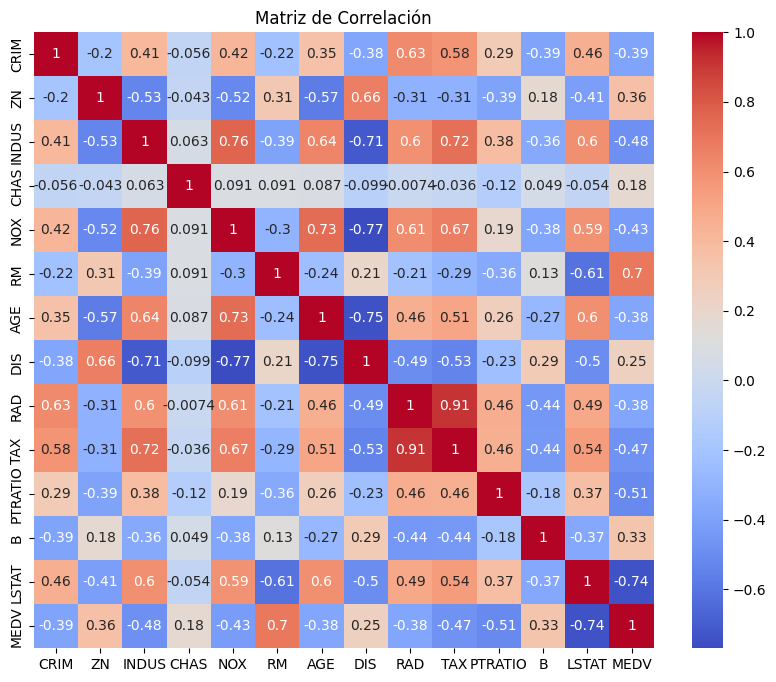

In [3]:
# Visualización de la correlación entre las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

1. Correlaciones con la variable objetivo (MEDV - Valor medio de las viviendas):

- LSTAT (Porcentaje de población de menor estatus económico): Tiene una fuerte correlación negativa con MEDV (-0.74). Esto significa que, a medida que aumenta el porcentaje de población de menor estatus, el valor medio de las viviendas disminuye considerablemente. Es uno de los indicadores más importantes en el modelo, sugiriendo que las áreas con menor estatus económico tienen precios de viviendas más bajos.

- RM (Número de habitaciones promedio): Muestra una fuerte correlación positiva con MEDV (0.70), lo que indica que las casas con más habitaciones tienden a ser más caras. Esta variable es uno de los mejores predictores del valor de las viviendas en el dataset.

- PTRATIO (Relación estudiantes/profesor): Tiene una correlación negativa moderada (-0.51), lo que sugiere que áreas con una mayor proporción de estudiantes por profesor tienden a tener viviendas de menor valor.

- TAX (Tasa de impuestos sobre la propiedad): También muestra una correlación negativa moderada (-0.47). Áreas con tasas impositivas más altas tienden a tener viviendas más económicas, lo cual puede estar relacionado con la carga fiscal más alta.

- NOX (Concentración de óxidos de nitrógeno): Tiene una correlación negativa (-0.43), lo que sugiere que las áreas con mayor contaminación tienden a tener viviendas más baratas.

2. Otras relaciones importantes en la matriz:

- RAD (Índice de accesibilidad a autopistas) y TAX: Tienen una fuerte correlación positiva (0.91), lo que indica que áreas con más accesibilidad a autopistas también tienen mayores tasas impositivas. Esto podría sugerir que las áreas mejor conectadas tienen infraestructuras más caras.

- DIS (Distancia a los principales centros de trabajo) y INDUS (Proporción de acres no residenciales): Tienen una fuerte correlación negativa (-0.71), lo que sugiere que las áreas más alejadas de centros de trabajo tienden a ser menos industriales.

In [6]:
# Separar las variables predictoras (X) y la variable objetivo (y)
# Supongo que la columna objetivo se llama 'MEDV', cámbiala si tiene otro nombre
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# 1. Modelo de Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_linear = linear_reg.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Regresión Lineal - MSE:", mse_linear)
print("Regresión Lineal - R²:", r2_linear)

Regresión Lineal - MSE: 24.291119474973517
Regresión Lineal - R²: 0.668759493535632


Regresión Lineal:

MSE: 24.29

R²: 0.67

La regresión lineal explica el 67% de la variabilidad en el valor medio de las viviendas. Aunque ofrece una buena base, su rendimiento podría mejorarse.

In [8]:
# 2. Modelo de Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf)
print("Random Forest - R²:", r2_rf)

Random Forest - MSE: 7.901513892156864
Random Forest - R²: 0.8922527442109116


Random Forest:

MSE: 7.90

R²: 0.89

El modelo de Random Forest tiene un desempeño mucho mejor que la regresión lineal. Explica el 89% de la variabilidad, lo que lo convierte en una mejor opción para la predicción de valores de viviendas.

In [9]:
# 3. Modelo de XGBoost (opcional)
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R²:", r2_xgb)

XGBoost - MSE: 6.560527271813469
XGBoost - R²: 0.9105388132305845


XGBoost:

MSE: 6.56

R²: 0.91

XGBoost ofrece el mejor rendimiento de todos los modelos evaluados, con un MSE más bajo y un R² más alto (91%). Esto indica que es capaz de captar patrones más complejos en los datos y es el modelo más adecuado para este conjunto de datos.

# Mejoras

Vamos a proceder con los siguientes pasos para mejorar el análisis y el modelo de predicción:

1. Optimización del modelo XGBoost con ajuste de hiperparámetros
Primero ajustaremos los hiperparámetros de XGBoost para mejorar su rendimiento.

2. Análisis de outliers
Revisaremos si hay outliers significativos en las variables más influyentes, como LSTAT y RM, para entender si están afectando al modelo.

3. Selección de variables clave
Vamos a simplificar el modelo eliminando algunas de las variables menos relevantes, enfocándonos en aquellas que tienen una fuerte correlación con la variable objetivo MEDV.

# Optimización de XGBoost

Vamos a usar GridSearchCV para ajustar los hiperparámetros de XGBoost, como:

- n_estimators: Número de árboles.

- max_depth: Profundidad máxima de los árboles.

- learning_rate: Tasa de aprendizaje.

- subsample: Proporción de muestras para el entrenamiento.

In [12]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir el modelo de XGBoost
xgb = XGBRegressor()

# Definir los hiperparámetros para el GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Usar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros: ", grid_search.best_params_)

# Predecir con el mejor modelo
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluar el rendimiento
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost optimizado - MSE:", mse_xgb)
print("XGBoost optimizado - R²:", r2_xgb)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
XGBoost optimizado - MSE: 6.777719540687358
XGBoost optimizado - R²: 0.9075771186402609


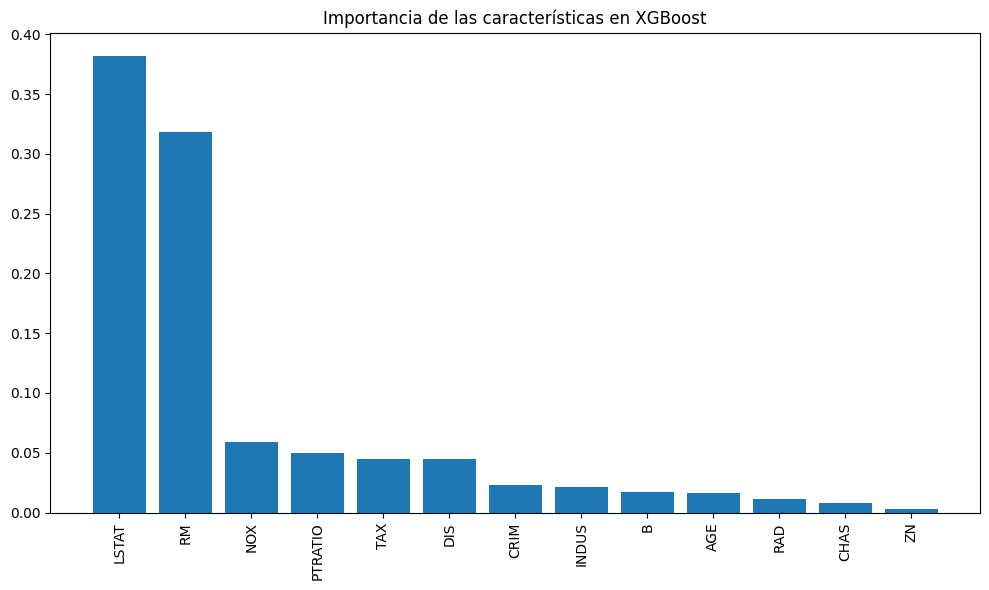

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características del modelo optimizado
importances = best_xgb.feature_importances_

# Crear un array con los nombres de las columnas (features) para asociarlos con las importancias
features = X_train.columns

# Ordenar los índices de las importancias de mayor a menor
indices = np.argsort(importances)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en XGBoost")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


# Conclusiones de las características más influyentes:

- LSTAT (bajo estatus socioeconómico):

  - Impacto negativo en el precio de la vivienda: Es razonable esperar que a medida que aumenta el porcentaje de la población de bajo estatus socioeconómico, los precios de las viviendas tiendan a disminuir, ya que las áreas con menor poder adquisitivo suelen tener menor demanda o pueden estar menos desarrolladas.

  - Correlación inversa: Esto puede estar respaldado también por la matriz de correlación, donde probablemente observes una fuerte correlación negativa entre LSTAT y MEDV (valor medio de las viviendas).

- RM (promedio de habitaciones por vivienda):

  - Impacto positivo en el precio de la vivienda: Las viviendas con más habitaciones tienden a ser más espaciosas y, por lo tanto, más caras. Esto explica por qué RM tiene una alta importancia en el modelo.

  - Indicador de calidad de vida: El número de habitaciones es un indicador de mayor espacio habitable, lo que aumenta la demanda de esas propiedades y, por lo tanto, su valor.

# Análisis de Outliers

Podemos usar boxplots para detectar posibles outliers en las variables más influyentes.

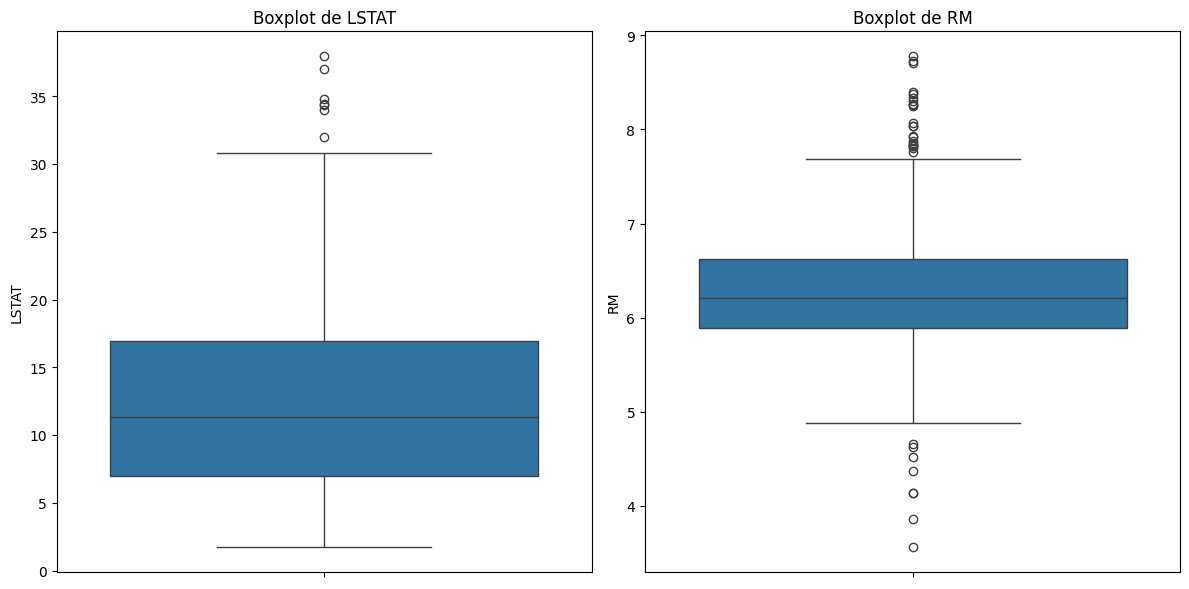

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplots de LSTAT y RM
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df['LSTAT'])
plt.title('Boxplot de LSTAT')

plt.subplot(1, 2, 2)
sns.boxplot(data=df['RM'])
plt.title('Boxplot de RM')

plt.tight_layout()
plt.show()


# Análisis de los resultados:

1. Boxplot de LSTAT (bajo estatus socioeconómico):

 - La caja se encuentra entre 6 y 16, lo que sugiere que la mayoría de los datos se distribuyen en este rango.

 - A partir de 30, aparecen puntos que probablemente sean outliers.
 - Esto significa que hay algunas zonas con un porcentaje inusualmente alto de personas de bajo estatus socioeconómico, lo cual es algo esperable en áreas que podrían considerarse desfavorecidas.

2. Boxplot de RM (promedio de habitaciones por vivienda):

 - La caja está prácticamente centrada, lo que indica una distribución simétrica de las habitaciones promedio por vivienda.
 
 - Se observan algunos outliers al inicio y al final, lo que implica que hay viviendas con un número de habitaciones extremadamente bajo o extremadamente alto.
 
 - Estos puntos extremos podrían representar viviendas de muy bajo costo (con pocas habitaciones) o propiedades de lujo (con muchas habitaciones).

# Conclusiones sobre los outliers:
 
 - LSTAT: Los outliers indican áreas con un porcentaje muy alto de personas de bajo estatus socioeconómico, lo cual podría ser relevante en la predicción de precios más bajos de las viviendas en esas áreas.
 
 - RM: Los outliers reflejan propiedades con un número de habitaciones fuera de lo común. Estas viviendas podrían tener un impacto notable en la predicción del precio, ya que podrían representar casos atípicos de propiedades muy caras o muy económicas.

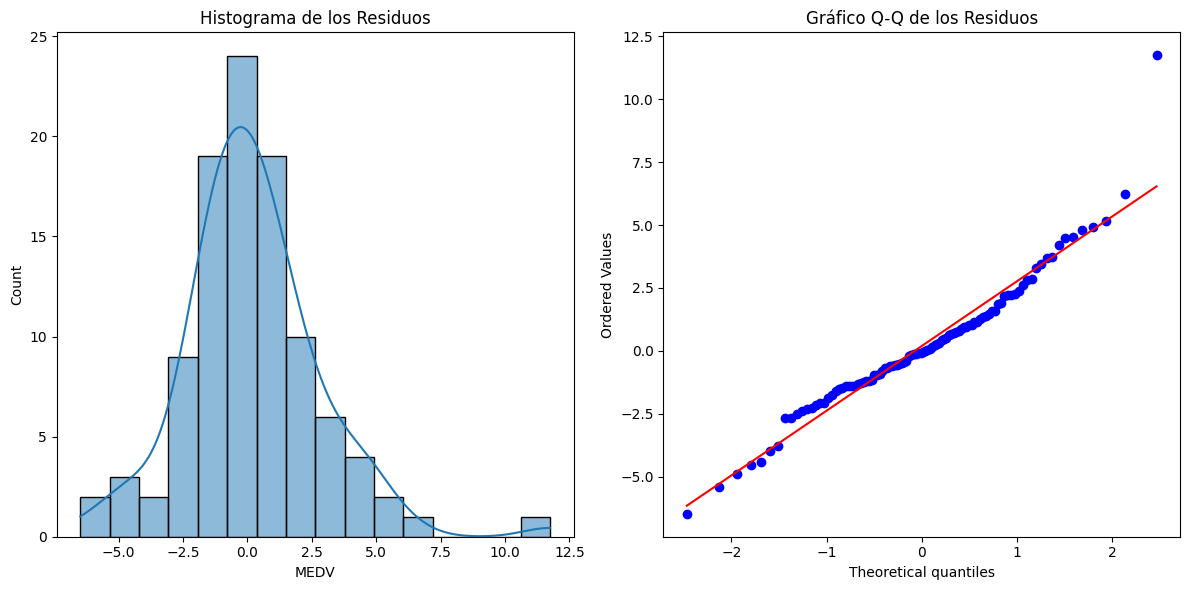

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calcular los residuos
residuals = y_test - y_pred_xgb

# Graficar el histograma de los residuos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histograma de los Residuos')

# Graficar el gráfico Q-Q
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')

plt.tight_layout()
plt.show()


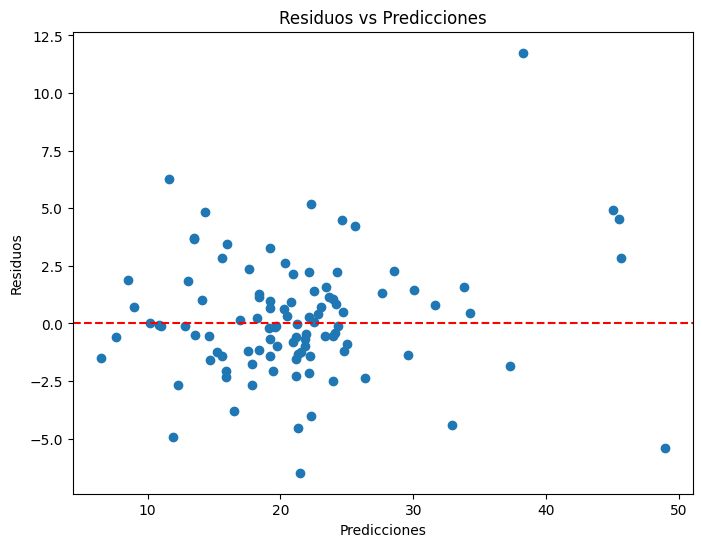

In [22]:
# Graficar los residuos vs las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.show()


Dado que los residuos siguen una distribución normal y la gráfica de residuos vs. predicciones no muestra patrones significativos, el modelo no presenta problemas evidentes de heterocedasticidad ni violación de supuestos de normalidad en los residuos. Estos son buenos indicadores de que el modelo está bien ajustado.

# Selección de Variables Clave

Basándonos en la matriz de correlación, nos enfocaremos en las variables más influyentes, como LSTAT, RM, PTRATIO, y NOX. Podemos eliminar algunas de las menos relevantes y luego entrenar de nuevo el modelo.

In [23]:
# Seleccionar variables clave
X_train_reduced = X_train[['LSTAT', 'RM', 'PTRATIO', 'NOX']]
X_test_reduced = X_test[['LSTAT', 'RM', 'PTRATIO', 'NOX']]

# Entrenar el modelo XGBoost con las variables seleccionadas
xgb_reduced = XGBRegressor()
xgb_reduced.fit(X_train_reduced, y_train)

# Predecir con las variables seleccionadas
y_pred_reduced = xgb_reduced.predict(X_test_reduced)

# Evaluar el rendimiento del modelo reducido
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print("XGBoost con variables seleccionadas - MSE:", mse_reduced)
print("XGBoost con variables seleccionadas - R²:", r2_reduced)


XGBoost con variables seleccionadas - MSE: 11.682374066757484
XGBoost con variables seleccionadas - R²: 0.8406958762618673


# Resultados:

1. MSE (Error cuadrático medio) con variables seleccionadas: 11.68

 - Aunque el MSE ha aumentado en comparación con el modelo completo (que tenía un MSE de aproximadamente 6.77), sigue siendo un error aceptable, considerando que estamos usando un conjunto más reducido de variables.

2. R² (Coeficiente de determinación) con variables seleccionadas: 0.841

 - El R² ha disminuido un poco respecto al modelo completo (que tenía un R² de 0.91). Sin embargo, sigue indicando un buen nivel de ajuste, lo que sugiere que las variables seleccionadas explican una parte significativa de la varianza en el precio de las casas.

# Interpretación:

- Variables clave: Las variables seleccionadas (LSTAT, RM, PTRATIO, NOX) parecen captar una parte importante de la relación con el precio de las viviendas. Estas variables están asociadas con:

 - LSTAT: Proporción de personas de bajo estatus socioeconómico.

 - RM: Promedio de habitaciones por vivienda.
 
 - PTRATIO: Relación alumno-profesor en la ciudad.

 - NOX: Concentración de óxidos de nitrógeno en el aire.

- Reducción de complejidad: Aunque el modelo con las variables seleccionadas tiene un menor rendimiento en comparación con el modelo completo, este tipo de selección ayuda a simplificar el análisis y puede ser útil para modelos interpretables en contextos donde se prefiera la simplicidad sobre la precisión máxima.

# Conclusión:

La selección de variables ha reducido el rendimiento del modelo, pero sigue ofreciendo un buen ajuste. Esto sugiere que las cuatro variables seleccionadas (LSTAT, RM, PTRATIO, NOX) son particularmente importantes para predecir el precio de las viviendas.

In [24]:
# Ingresar los valores de las variables manualmente
nuevo_dato = np.array([[10.5, 6.2, 15.0, 0.5]])  # Ejemplo: LSTAT=10.5, RM=6.2, PTRATIO=15.0, NOX=0.5

# Hacer la predicción con el modelo reducido
prediccion = xgb_reduced.predict(nuevo_dato)

print(f'La predicción del precio de la vivienda es: {prediccion[0]:.2f}')


La predicción del precio de la vivienda es: 23.90


In [28]:
# Ingresar los valores de las variables manualmente
nuevo_dato = np.array([[4.98, 6.5750, 15.30, 0.5380]]) 

# Hacer la predicción con el modelo reducido
prediccion = xgb_reduced.predict(nuevo_dato)

print(f'La predicción del precio de la vivienda es: {prediccion[0]:.2f}')


La predicción del precio de la vivienda es: 24.00


La primera prediccion es con datos aleatorios y la segunda prediccion es con datos de la base, lo cual muestra una prediccion muy acertada